In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Reading the Dataset
df = pd.read_csv("/content/531.csv")
df.head()

,cycles:u,instructions:u,branch-misses:u,cache-misses:u,L1-dcache-load-misses,L1-icache-load-misses,LLC-load-misses,LLC-store-misses,branch-load-misses,dTLB-load-misses,...,dtlb_load_misses.walk_pending:u,itlb_misses.walk_pending:u,dtlb_store_misses.walk_pending:u,dtlb_load_misses.walk_pending:u.1,offcore_requests.l3_miss_demand_data_rd:u,ocr.hwpf_l2_rfo.l3_miss:u,ocr.demand_data_rd.l3_miss:u,icache_64b.iftag_miss:u,IPC,CPI
0,456382788,526301578,2308222,18105979,21471468,321683,76832,19904942,1994052,151803,...,11950206,94428,5723,11950206,194718,363,190292,812873,1.15,0.867151
1,456932563,585898388,3192417,309301,1552710,10335615,145289,785,2688782,106733,...,18080470,42383,7101,18080470,254294,1538,239332,1294191,1.28,0.779884
2,452508238,583159676,3216056,469297,1426371,3351521,235992,1613,4041808,143115,...,16612953,49501,2172,16612953,216183,732,175069,10568424,1.29,0.775959
3,443535278,576290234,3323495,477927,1518593,2702610,241420,419,4474620,143624,...,20249581,43741,8992,20249581,227191,538,199682,4209595,1.30,0.769639
4,455507704,631168908,3395922,555387,1640198,9562392,181343,754,2870830,106520,...,20932410,98307,6567,20932410,247958,1815,267667,1008420,1.39,0.721689


In [ ]:
df.shape

(2168, 25)

In [ ]:
#Setting the value for X and Y
df.drop(['dtlb_load_misses.walk_pending:u.1'],axis=1,inplace = True)
df.drop_duplicates(inplace = True)
X = df[['branch-misses:u', 'cache-misses:u', 'L1-dcache-load-misses', 'L1-icache-load-misses', 'LLC-load-misses', 'LLC-store-misses', 'branch-load-misses', 'dTLB-load-misses', 'dTLB-store-misses', 'iTLB-load-misses', 'l2_rqsts.code_rd_miss:u', 'l2_rqsts.demand_data_rd_miss:u', 'l2_rqsts.all_demand_miss:u', 'dtlb_load_misses.walk_pending:u', 'itlb_misses.walk_pending:u', 'dtlb_store_misses.walk_pending:u', 'offcore_requests.l3_miss_demand_data_rd:u', 'ocr.hwpf_l2_rfo.l3_miss:u', 'ocr.demand_data_rd.l3_miss:u', 'icache_64b.iftag_miss:u']]
i = df['instructions:u'].values.reshape(-1,1)
y = df['CPI']
X = np.divide(X,i)
df_new = X.copy()
df_new['CPI'] = y

In [ ]:
df_new.head()

,branch-misses:u,cache-misses:u,L1-dcache-load-misses,L1-icache-load-misses,LLC-load-misses,LLC-store-misses,branch-load-misses,dTLB-load-misses,dTLB-store-misses,iTLB-load-misses,...,l2_rqsts.demand_data_rd_miss:u,l2_rqsts.all_demand_miss:u,dtlb_load_misses.walk_pending:u,itlb_misses.walk_pending:u,dtlb_store_misses.walk_pending:u,offcore_requests.l3_miss_demand_data_rd:u,ocr.hwpf_l2_rfo.l3_miss:u,ocr.demand_data_rd.l3_miss:u,icache_64b.iftag_miss:u,CPI
0,0.004386,0.034402,0.040797,0.000611,0.000146,3.782041e-02,0.003789,0.000288,3.230087e-07,0.000003,...,0.000704,0.000815,0.022706,0.000179,0.000011,0.000370,6.897186e-07,0.000362,0.001545,0.867151
1,0.005449,0.000528,0.002650,0.017641,0.000248,1.339823e-06,0.004589,0.000182,2.133476e-07,0.000001,...,0.000576,0.000631,0.030859,0.000072,0.000012,0.000434,2.625029e-06,0.000408,0.002209,0.779884
2,0.005515,0.000805,0.002446,0.005747,0.000405,2.765966e-06,0.006931,0.000245,1.800536e-07,0.000002,...,0.000539,0.000603,0.028488,0.000085,0.000004,0.000371,1.255231e-06,0.000300,0.018123,0.775959
3,0.005767,0.000829,0.002635,0.004690,0.000419,7.270642e-07,0.007765,0.000249,1.648475e-07,0.000004,...,0.000497,0.000549,0.035138,0.000076,0.000016,0.000394,9.335574e-07,0.000346,0.007305,0.769639
4,0.005380,0.000880,0.002599,0.015150,0.000287,1.194609e-06,0.004548,0.000169,2.772633e-07,0.000001,...,0.000550,0.000637,0.033165,0.000156,0.000010,0.000393,2.875617e-06,0.000424,0.001598,0.721689


<Axes: >

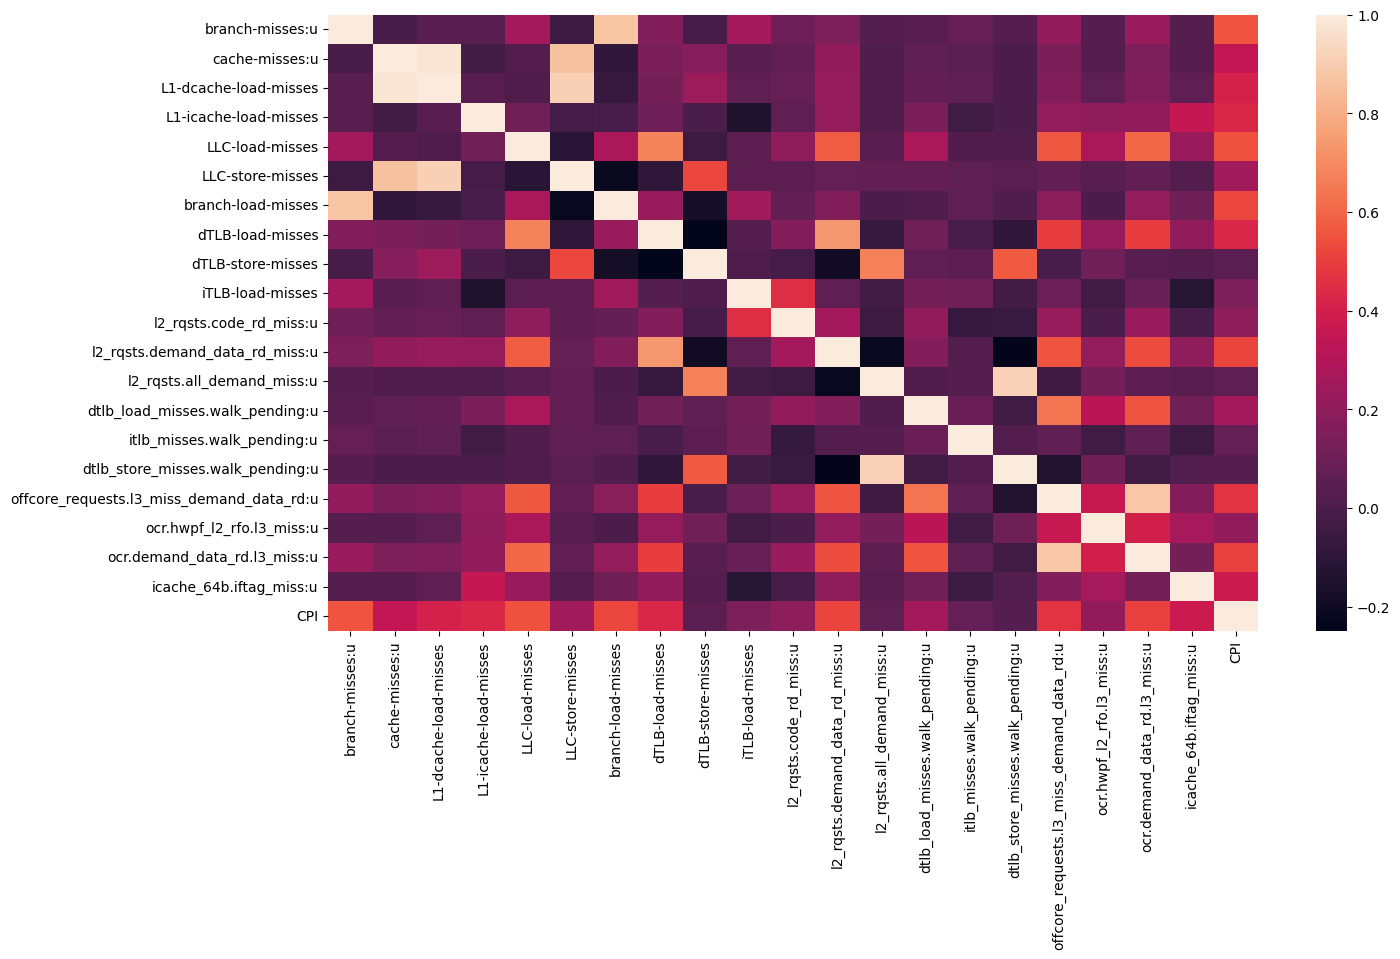

In [ ]:
corr = df_new.corr()
plt.figure (figsize = (15,8))
sns.heatmap(corr)

In [ ]:
X.drop(['LLC-store-misses','branch-load-misses','cache-misses:u','dTLB-load-misses','dTLB-store-misses','offcore_requests.l3_miss_demand_data_rd:u','ocr.hwpf_l2_rfo.l3_miss:u','l2_rqsts.all_demand_miss:u','iTLB-load-misses','dtlb_store_misses.walk_pending:u','itlb_misses.walk_pending:u'],axis=1,inplace = True)
X.head()

,branch-misses:u,L1-dcache-load-misses,L1-icache-load-misses,LLC-load-misses,l2_rqsts.code_rd_miss:u,l2_rqsts.demand_data_rd_miss:u,dtlb_load_misses.walk_pending:u,ocr.demand_data_rd.l3_miss:u,icache_64b.iftag_miss:u
0,0.004386,0.040797,0.000611,0.000146,0.000052,0.000704,0.022706,0.000362,0.001545
1,0.005449,0.002650,0.017641,0.000248,0.000051,0.000576,0.030859,0.000408,0.002209
2,0.005515,0.002446,0.005747,0.000405,0.000038,0.000539,0.028488,0.000300,0.018123
3,0.005767,0.002635,0.004690,0.000419,0.000042,0.000497,0.035138,0.000346,0.007305
4,0.005380,0.002599,0.015150,0.000287,0.000072,0.000550,0.033165,0.000424,0.001598


In [ ]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np

mi = mutual_info_regression(X, y)
print(mi)


[0.33115937 0.46088143 0.09050113 0.32608354 0.08759468 0.18921241
 0.12005512 0.19414347 0.0459156 ]


In [ ]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()

In [ ]:
#Splitting dataset
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [ ]:
mlr.fit(X_train,y_train)

LinearRegression()

In [ ]:
X_test.head()

,branch-misses:u,L1-dcache-load-misses,L1-icache-load-misses,LLC-load-misses,l2_rqsts.code_rd_miss:u,l2_rqsts.demand_data_rd_miss:u,dtlb_load_misses.walk_pending:u,ocr.demand_data_rd.l3_miss:u,icache_64b.iftag_miss:u
1820,0.004970,0.001459,0.001017,0.000219,0.000032,0.000411,0.017515,0.000277,0.001065
1766,0.004929,0.001568,0.000957,0.000248,0.000032,0.000341,0.018147,0.000240,0.000898
1119,0.005241,0.001514,0.001327,0.000224,0.000024,0.000368,0.021739,0.000249,0.001282
433,0.005108,0.001721,0.000945,0.000272,0.000027,0.000427,0.014190,0.000249,0.001150
1471,0.004695,0.001566,0.001137,0.000289,0.000025,0.000399,0.014983,0.000232,0.001087


In [ ]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

Intercept:  0.27942480836008743
Coefficients:


[('branch-misses:u', 25.46253146522196),
 ('L1-dcache-load-misses', 8.80748891139935),
 ('L1-icache-load-misses', 11.509268102173772),
 ('LLC-load-misses', 200.98887905289612),
 ('l2_rqsts.code_rd_miss:u', 28.48061944017447),
 ('l2_rqsts.demand_data_rd_miss:u', 52.00258318656579),
 ('dtlb_load_misses.walk_pending:u', 0.19920759291780143),
 ('ocr.demand_data_rd.l3_miss:u', 9.604610401884429),
 ('icache_64b.iftag_miss:u', 7.881887103671135)]

In [ ]:
#Prediction of test set
y_pred_mlr= mlr.predict(X_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [0.51136128 0.51123822 0.52308784 0.52752704 0.5191823  0.53211305
 0.5037563  0.53256505 0.54905237 0.54258016 0.54219485 0.52948961
 0.50934458 0.52819785 0.5312221  0.56970283 0.51822354 0.53358732
 0.50032005 0.52733156 0.52090674 0.50875864 0.55281464 0.52321903
 0.52001532 0.52024348 0.49016938 0.51641641 0.52955996 0.52018207
 0.53481707 0.54413979 0.51446969 0.5106506  0.49631004 0.53584241
 0.50823947 0.5149279  0.51098993 0.49316169 0.52713551 0.50843327
 0.54667843 0.55037358 0.53345725 0.52294753 0.5160827  0.58682369
 0.52694158 0.52622889 0.50008683 0.56754872 0.53222768 0.52526715
 0.53970363 0.54329377 0.47342522 0.54372053 0.55374084 0.53340789
 0.51354495 0.52109555 0.55972699 0.51333871 0.51657449 0.50608557
 0.509929   0.53050614 0.53848719 0.49788568 0.53080112 0.52701732
 0.5450084  0.53044875 0.50280948 0.52089658 0.52173201 0.53420246
 0.49406899 0.52736873 0.49393096 0.50469237 0.54604237 0.49539983
 0.51988403 0.52305107 0.50706562 0.5

In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
1820,0.506365,0.511361
1766,0.507893,0.511238
1119,0.521515,0.523088
433,0.537191,0.527527
1471,0.514543,0.519182


In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
r2 = mlr.score(X_test,y_test)
print('R squared: {:.2f}'.format(r2*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 72.70
Mean Absolute Error: 0.007109774035444409
Mean Square Error: 0.00010896964770374935
Root Mean Square Error: 0.010438852796344497


In [ ]:
final = X.mean()
print(final)

branch-misses:u                    0.004995
L1-dcache-load-misses              0.001669
L1-icache-load-misses              0.001115
LLC-load-misses                    0.000268
l2_rqsts.code_rd_miss:u            0.000031
l2_rqsts.demand_data_rd_miss:u     0.000403
dtlb_load_misses.walk_pending:u    0.017525
ocr.demand_data_rd.l3_miss:u       0.000268
icache_64b.iftag_miss:u            0.001103
dtype: float64


In [ ]:
R = np.multiply(final,mlr.coef_)
print(R)
print(R.sum()+mlr.intercept_)

branch-misses:u                    0.127181
L1-dcache-load-misses              0.014698
L1-icache-load-misses              0.012830
LLC-load-misses                    0.053782
l2_rqsts.code_rd_miss:u            0.000890
l2_rqsts.demand_data_rd_miss:u     0.020932
dtlb_load_misses.walk_pending:u    0.003491
ocr.demand_data_rd.l3_miss:u       0.002569
icache_64b.iftag_miss:u            0.008696
dtype: float64
0.5244936842941498


In [ ]:
finaly = y.mean()
print(finaly)

0.5243999179723248


In [ ]:
n = df_new.shape[0]
p = X.shape[1]
print(n,p)

2168 9


In [ ]:
#Adjusted r2 score
r2adj = 1-(1-r2)*(n-1)/(n-p-1)
print(r2adj*100)

72.59094929515474


In [ ]:
#Residuals (added abs for now)
residuals = (y_test - y_pred_mlr)
print(residuals)

1820   -0.004997
1766   -0.003345
1119   -0.001573
433     0.009664
1471   -0.004640
          ...   
1029   -0.005613
801    -0.002810
2110   -0.006271
1207   -0.015530
599    -0.003770
Name: CPI, Length: 434, dtype: float64


In [ ]:
#F statistic
fstat = ((r2)/(1-r2))/(p/(n-p-1))
print(fstat)

638.6830648489755


In [ ]:
#p-value
from scipy.stats import f
p_value = 1-f.cdf(fstat,p,n-p-1)
print(p_value)

1.1102230246251565e-16


In [ ]:
import pandas as pd
R = pd.concat([pd.Series([mlr.intercept_],index = ['Base CPI']), R])
print(R)

Base CPI                           0.279425
branch-misses:u                    0.127181
L1-dcache-load-misses              0.014698
L1-icache-load-misses              0.012830
LLC-load-misses                    0.053782
l2_rqsts.code_rd_miss:u            0.000890
l2_rqsts.demand_data_rd_miss:u     0.020932
dtlb_load_misses.walk_pending:u    0.003491
ocr.demand_data_rd.l3_miss:u       0.002569
icache_64b.iftag_miss:u            0.008696
dtype: float64


[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted values')]

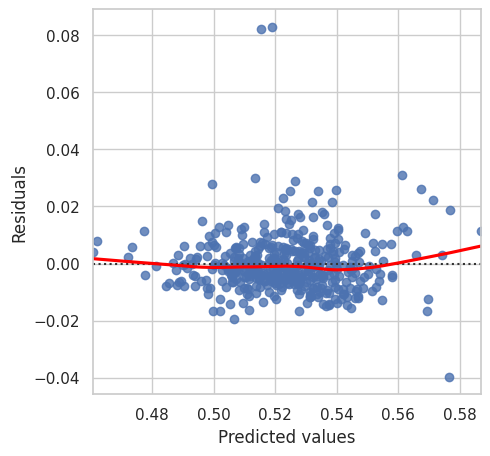

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize =(5,5))
sns.residplot(x=y_pred_mlr,y=residuals,ax=ax, lowess=True, line_kws={"color": "red"})
ax.set(ylabel='Residuals',xlabel='Predicted values')

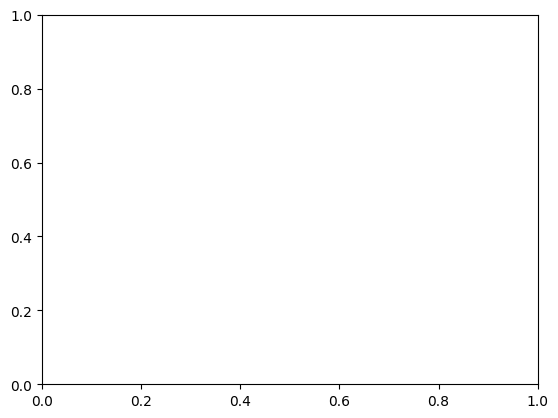

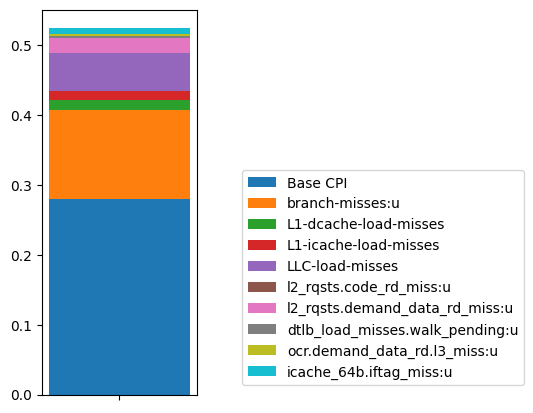

In [ ]:
fig, ax = plt.subplots()
groups = ['']
plt.figure (figsize = (2,5))
# Stacked bar chart with loop
for i in range(len(R)):
  plt.bar(groups, R[i],label = R.index[i], bottom = np.sum(R[:i], axis = 0))

plt.legend(bbox_to_anchor = (1.25, 0.6), loc='upper left')
plt.tight_layout()